# HTML in DASH
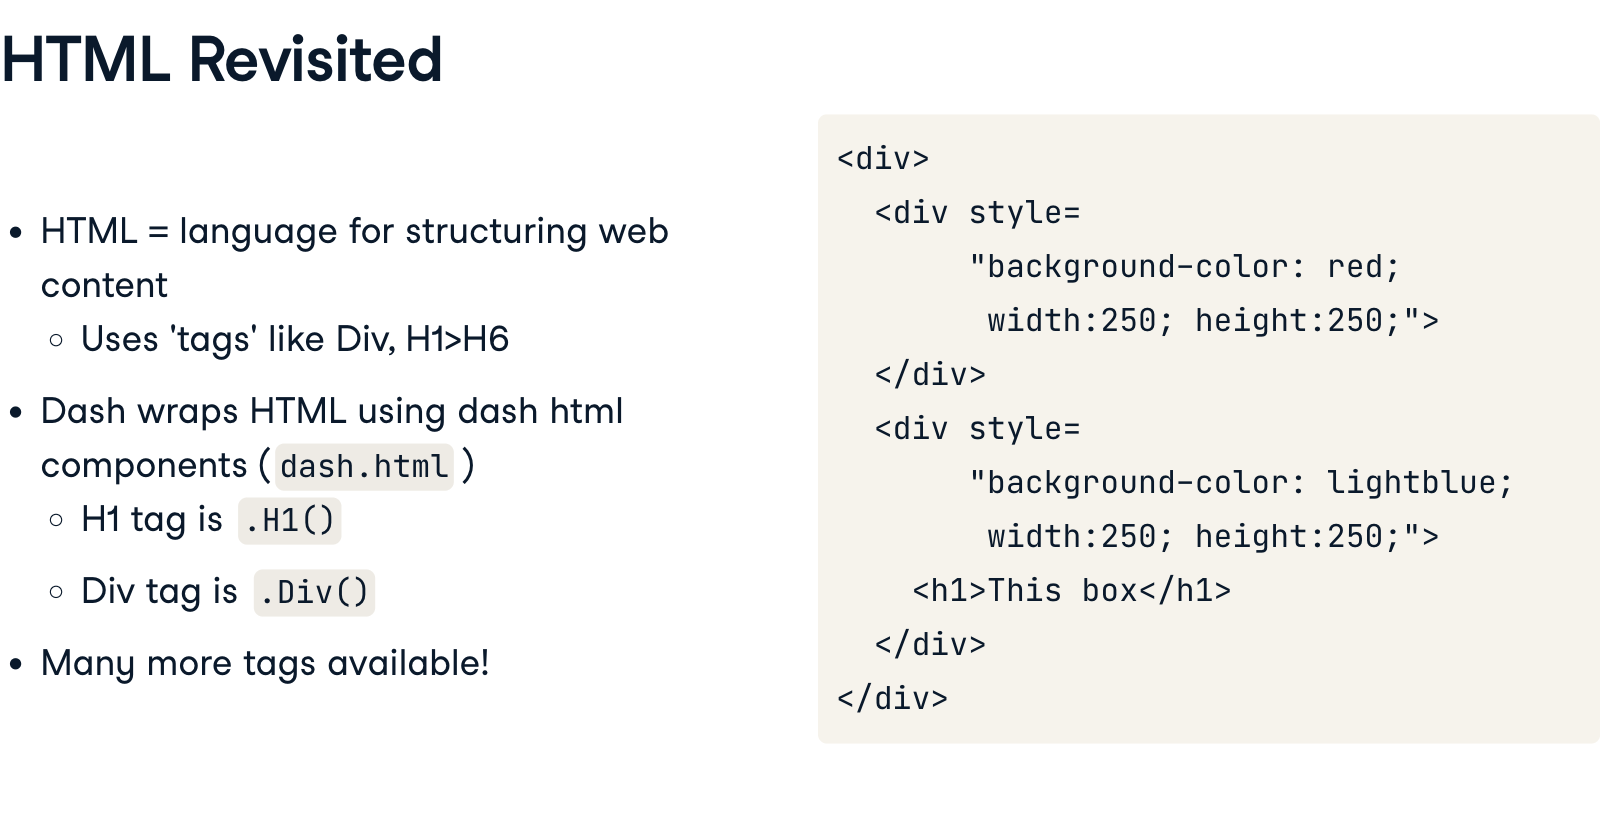

## Structuring tags
- .Br() = New line break 
- .Img() = Insert an image 

## Lists in HTML Dash
- .UL() for unordered list (bullet-points)
- .OL() for ordered list (numbered-points)
- .Li() for each list element

## Inserting a company logo 
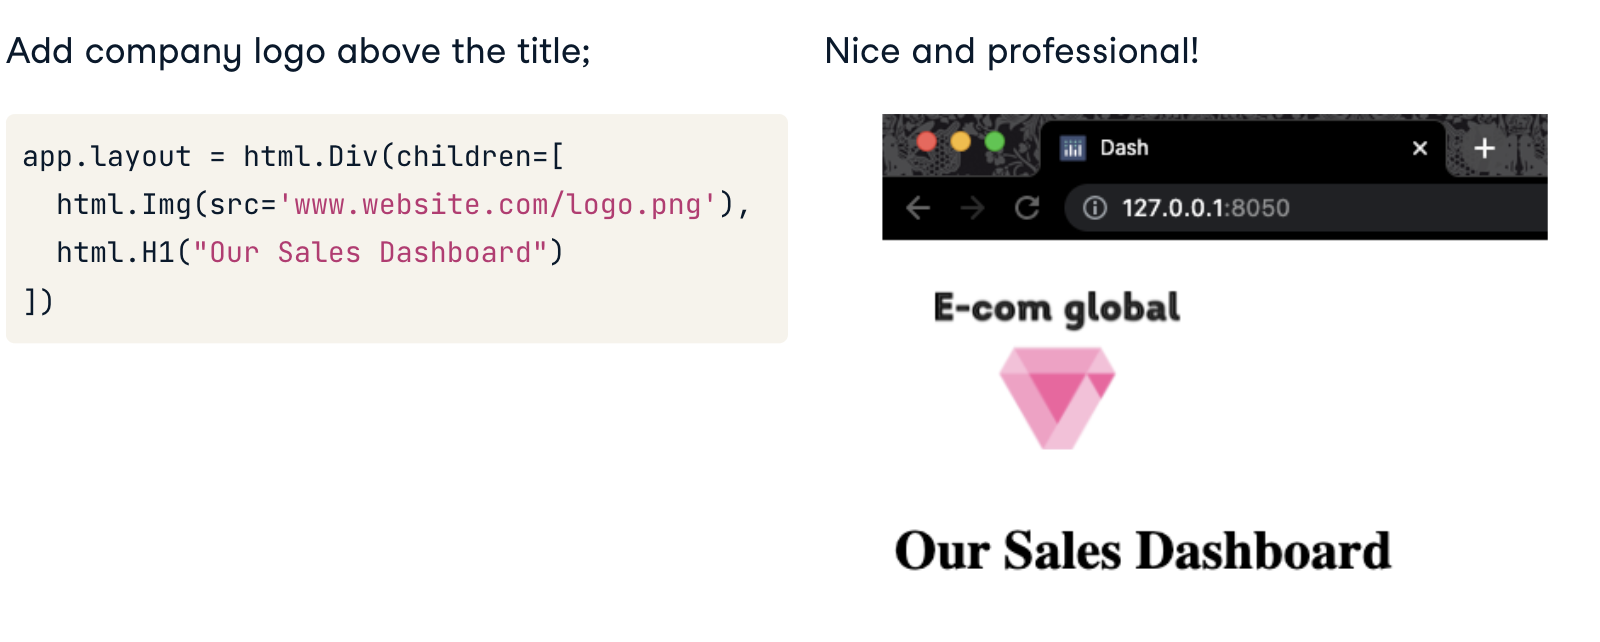

## Text tags 
- .P() or .Span() = Insert plain text </br>
Accept a children argument (list of text, .P() or .Span()) 
- .B() = Bold some text
- .I() = Italicize some text 

## HTML text tags in Dash 
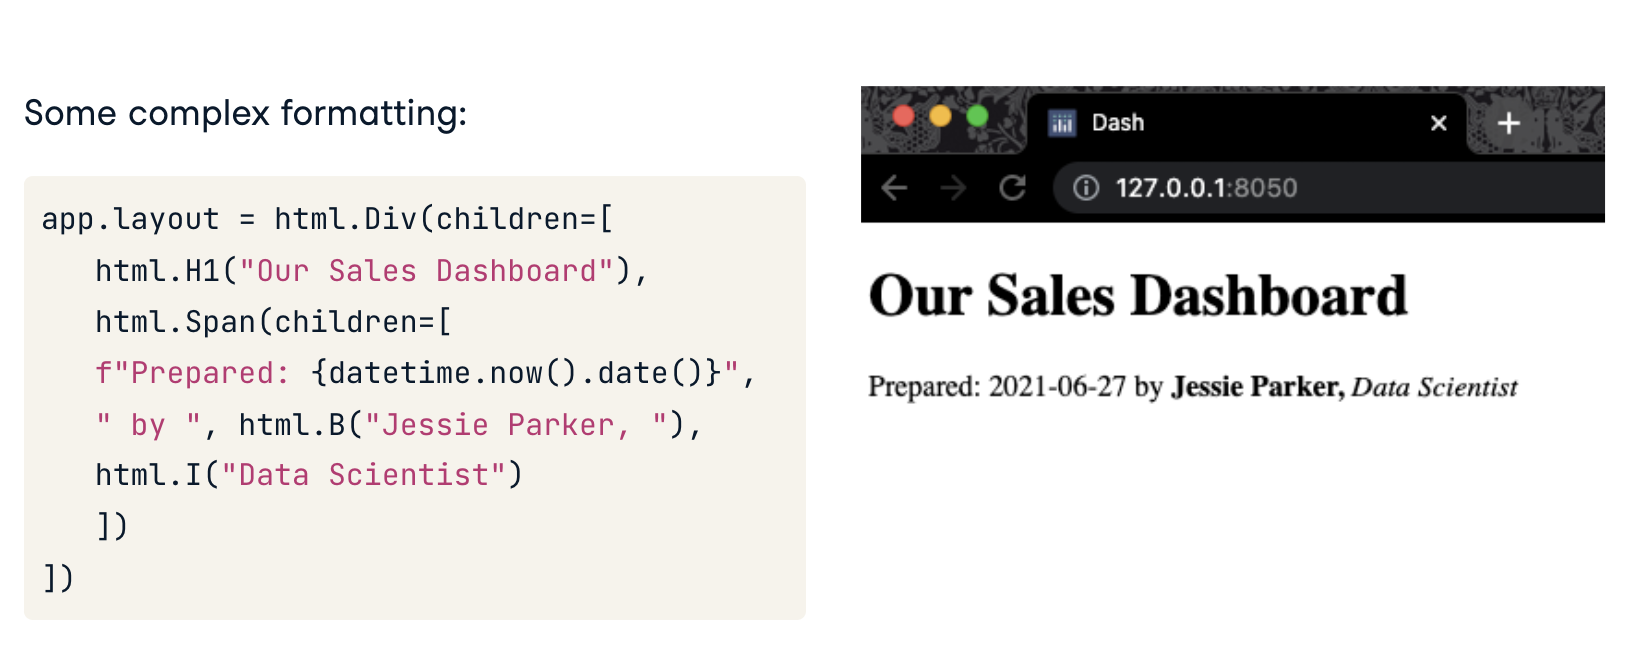

## Breaking up the text 
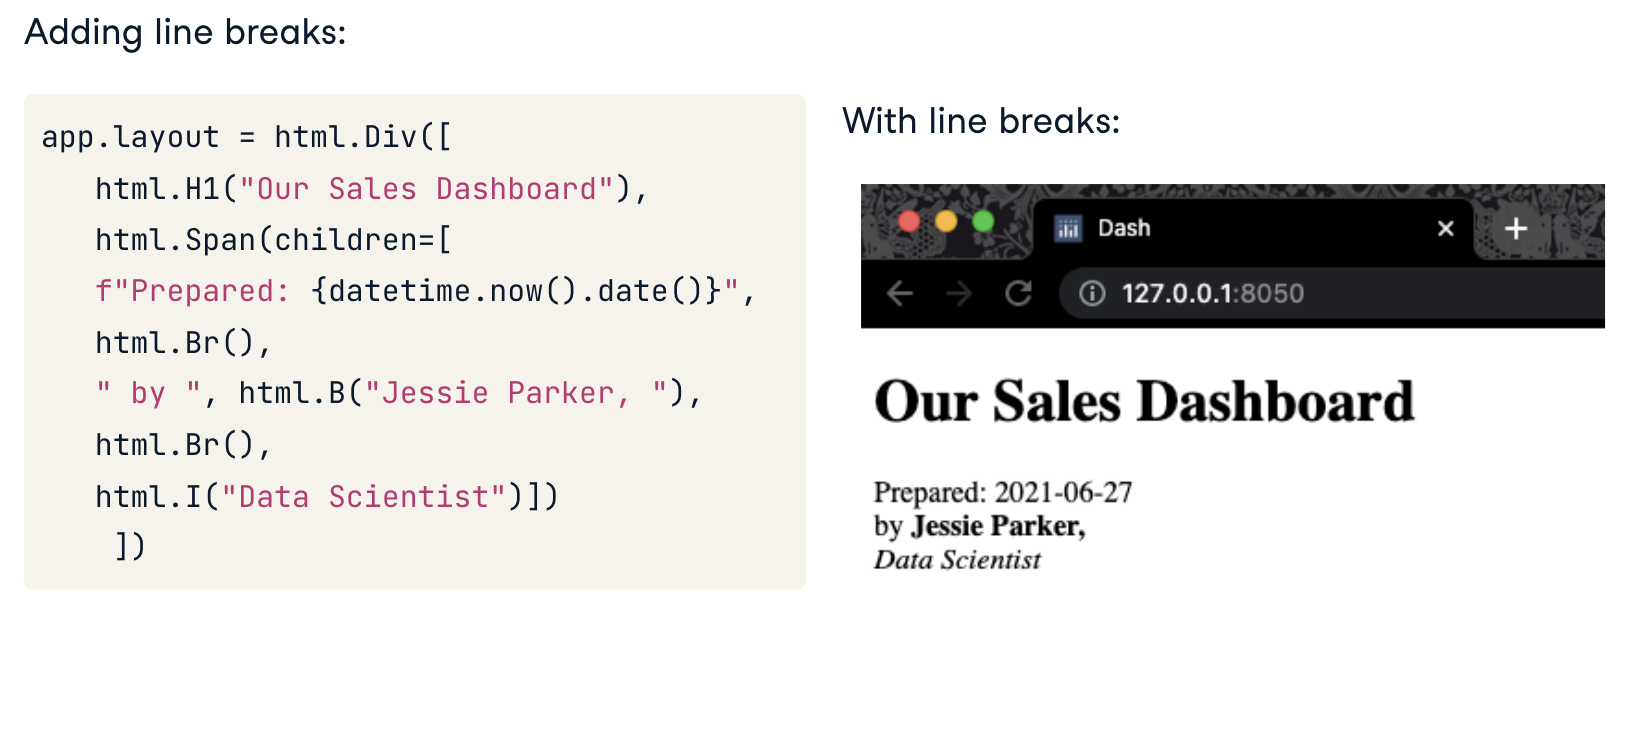

In [2]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd


data = {
    'Country': ['United Kingdom', 'Germany', 'France', 'Australia', 'Hong Kong'],
    'OrderValue': [150000, 120000, 110000, 90000, 85000]
}

ecom_sales = pd.DataFrame(data)

logo_link = 'https://assets.datacamp.com/production/repositories/5893/datasets/2bac9433b0e904735feefa26ca913fba187c0d55/e_com_logo.png'
ecom_bar = ecom_sales.groupby('Country')['OrderValue'].agg('sum').reset_index(name='Total Sales ($)').sort_values(by='Total Sales ($)', ascending=False)
top_country = ecom_bar.loc[0]['Country']    

bar_fig_country = px.bar(ecom_bar, 
                         x='Total Sales ($)', 
                         y='Country', 
                         color='Country', 
                         color_discrete_map={'United Kingdom':'lightblue', 'Germany':'orange', 'France':'darkblue', 'Australia':'green', 'Hong Kong':'red'})         
    
app = dash.Dash(__name__)

app.layout = html.Div([
  # Add the company logo
  html.Img(src='https://assets.datacamp.com/production/repositories/5893/datasets/2bac9433b0e904735feefa26ca913fba187c0d55/e_com_logo.png'),
  
  html.H1('Sales by Country'),
  
  html.Div(dcc.Graph(figure=bar_fig_country), 
           style={'width':'750px', 'margin':'auto'}),
    
  # Add an overall text-containing component
  html.Span(children=[
    # Add the top country text
    'This year, the most sales came from: ', 
    html.B(top_country),
    # Italicize copyright notice
    html.I(' Copyright E-Com INC')])
    ], 
  style={'text-align':'center', 'font-size':22})

if __name__ == '__main__':
    app.run_server(debug=True)

In [8]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

data = {
    'Major Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Electronics', 'Clothing'],
    'Minor Category': ['Laptops', 'Smartphones', 'Shirts', 'Dresses', 'Tablets', 'Jeans'],
    'Total Orders': [100, 150, 80, 60, 120, 75]
}

ecom_sales = pd.DataFrame(data)
#logo_link = 'https://assets.datacamp.com/production/repositories/5893/datasets/2bac9433b0e904735feefa26ca913fba187c0d55/e_com_logo.png'
ecom_category = ecom_sales.groupby(['Major Category','Minor Category']).size().reset_index(name='Total Orders').sort_values(by='Total Orders', ascending=False).reset_index(drop=True)
num1_cat, num1_salesvol = ecom_category.loc[0].tolist()[1:3]
num2_cat, num2_salesvol = ecom_category.loc[1].tolist()[1:3]
ecom_bar = px.bar(ecom_category, x='Total Orders', y='Minor Category', color='Major Category')
ecom_bar.update_layout({'yaxis':{'dtick':1, 'categoryorder':'total ascending'}})             

app = dash.Dash(__name__)

app.layout = html.Div([
    #html.Img(src=logo_link),
    html.H1('Top Sales Categories'),
    html.Div(dcc.Graph(figure=ecom_bar)),
    html.Span(children=[
    'The top 2 sales categories were:',
    # Set up an ordered list
    html.Ol(children=[
      	# Add two list elements with the top category variables
        html.Li(children=[num1_cat, ' with ', num1_salesvol, ' sales volume']),
        html.Li(children=[num2_cat, ' with ', num2_salesvol, ' sales volume'])
    ], style={'width':'350px', 'margin':'auto'}),
    # Add a line break before the copyright notice
    html.Br(),
    html.I('Copyright E-Com INC')])
    ], style={'text-align':'center', 'font-size':22})

if __name__ == '__main__':
    app.run_server(debug=True)